<a href="https://colab.research.google.com/github/Debrup10/industryready/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=11)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [5]:
## Model Training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [6]:
## Model Predict
y_pred = logistic.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0]


In [7]:
## Getting the probability scores

y_pred_prob = logistic.predict_proba(X_test)
print(y_pred_prob[:5])

[[0.30144773 0.69855227]
 [0.75196907 0.24803093]
 [0.87392872 0.12607128]
 [0.4956821  0.5043179 ]
 [0.46148899 0.53851101]]


In [8]:
## Model Performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
score = accuracy_score(y_test, y_pred)
print(score)

0.6633333333333333


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 96  44]
 [ 57 103]]


In [11]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       140
           1       0.70      0.64      0.67       160

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.67      0.66      0.66       300



In [12]:
## HYPERPARAMETER TUNING
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(penalty = penalty, solver = solver, C = C)


In [13]:
## Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = params, scoring="accuracy", cv = cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [14]:
print(grid.best_params_, grid.best_score_, sep = "\n")

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.6885714285714285


In [15]:
y_pred = grid.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Importing the function

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[113  27]
 [ 73  87]]


In [17]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.61      0.81      0.69       140
           1       0.76      0.54      0.64       160

    accuracy                           0.67       300
   macro avg       0.69      0.68      0.66       300
weighted avg       0.69      0.67      0.66       300



In [ ]:
## AUC ROC curve

In [18]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
model_prob = model.predict_proba(X_test)
model_prob = model_prob[:,1]

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
## AUC
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc, model_auc, sep = "\n")

0.5
0.7288839285714286


In [24]:
## ROC

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, _ = roc_curve(y_test, model_prob)

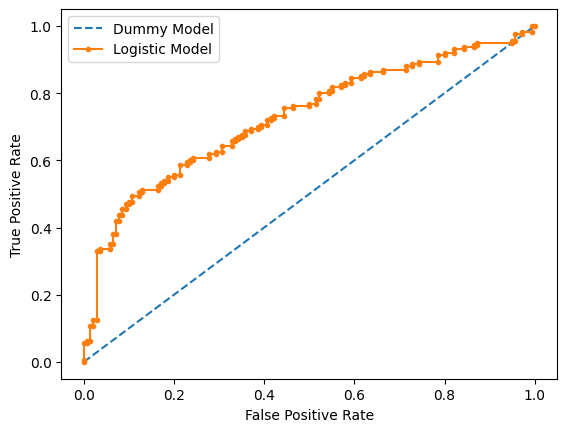

In [27]:
## Plot the model

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

# Axis Label

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()



In [28]:
## ROC

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

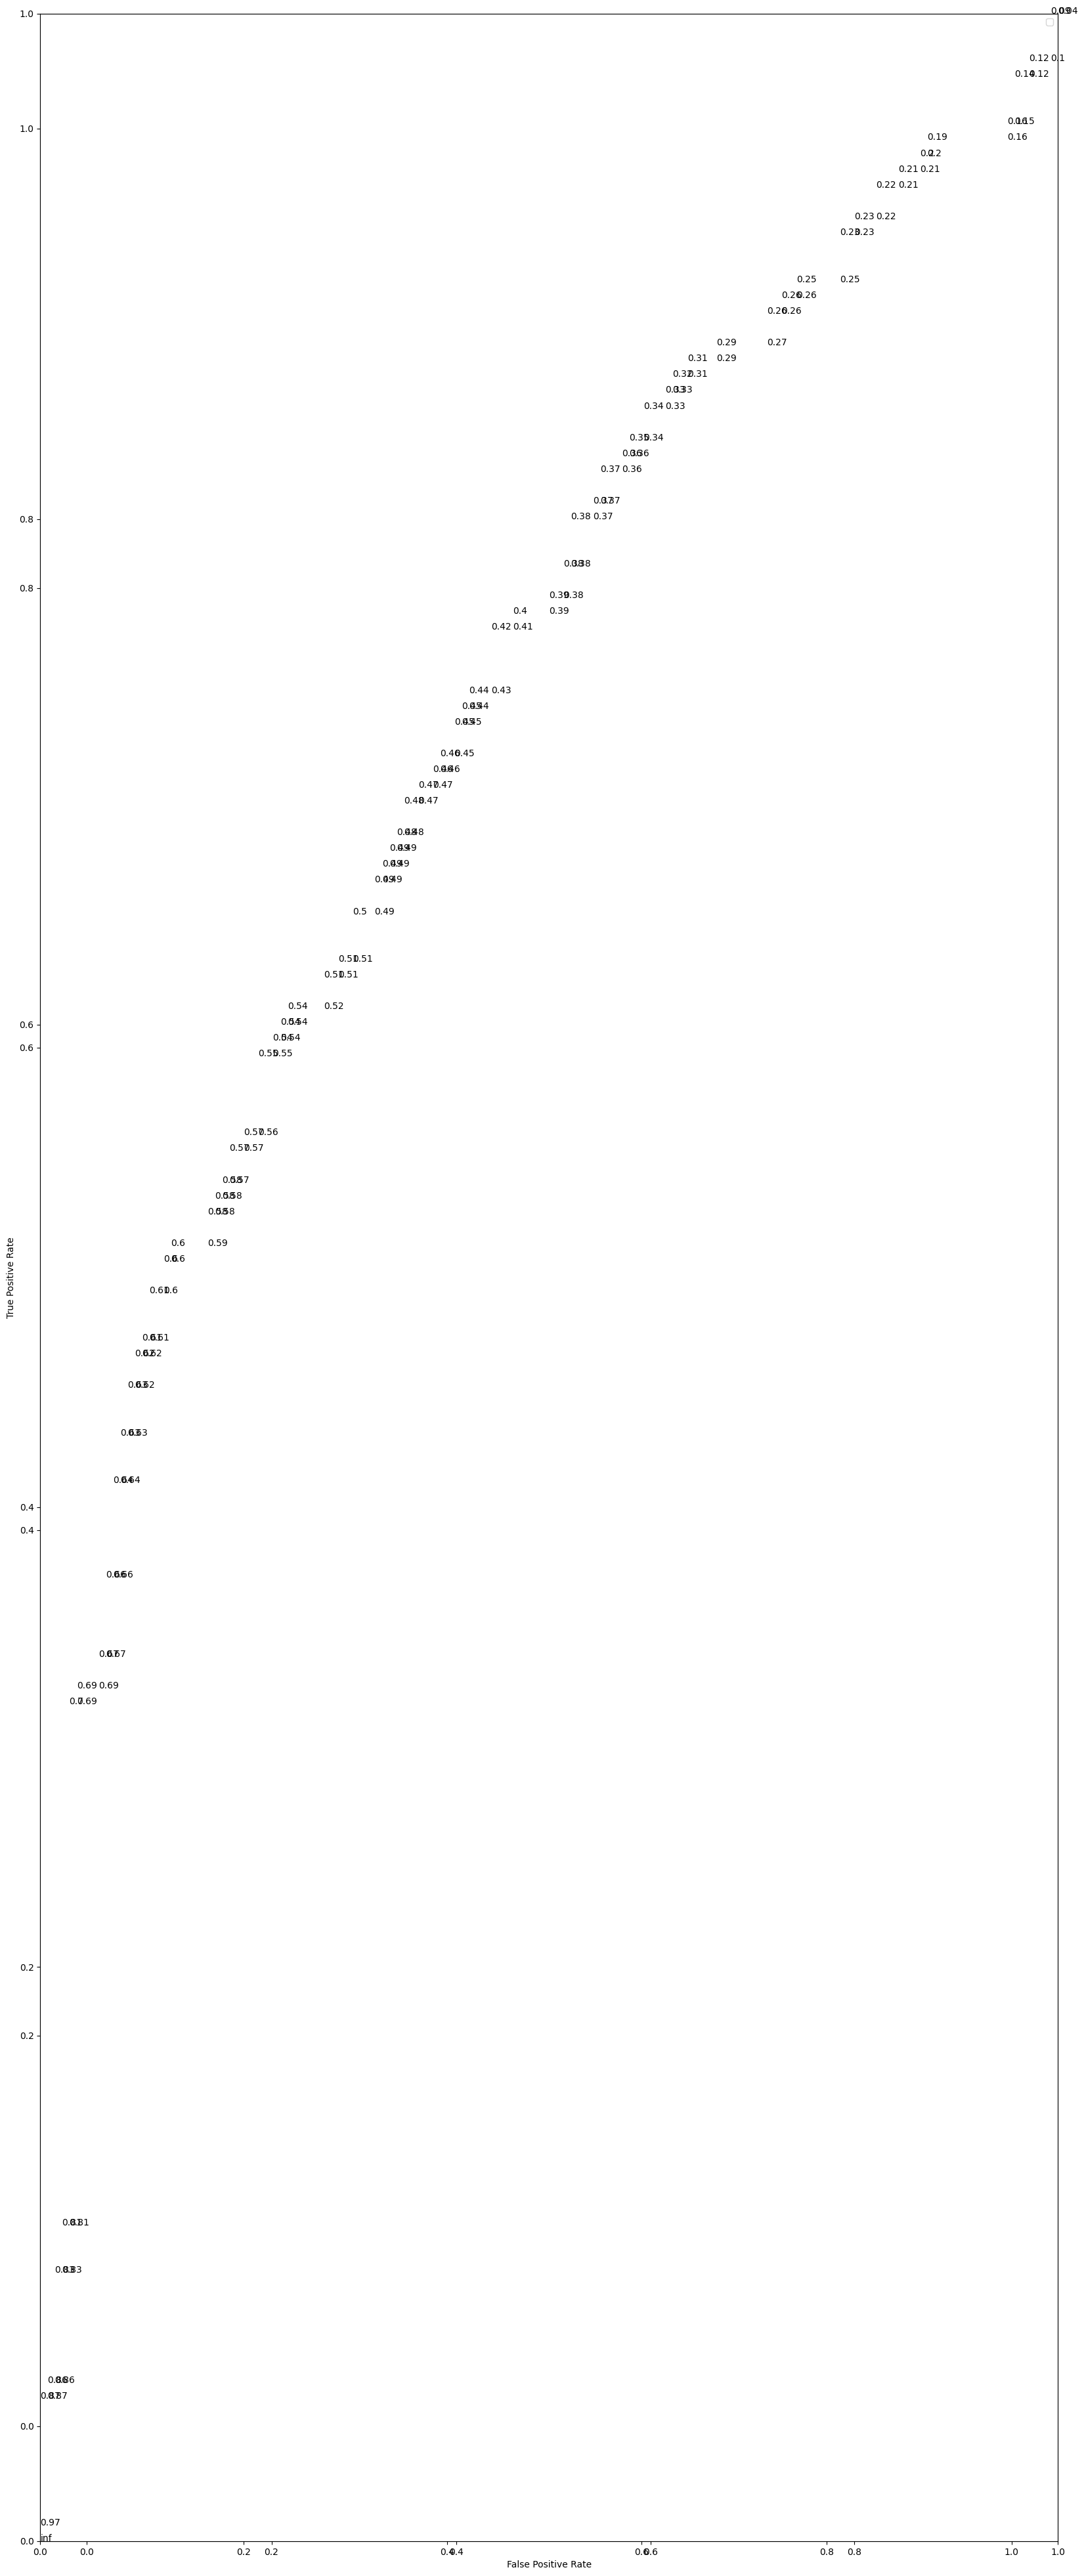

In [29]:
import numpy as np
fig = plt.figure(figsize = (20,50))

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

ax = fig.add_subplot(111)

for xyz in zip(model_fpr, model_tpr, thresholds):
  ax.annotate('%s' % np.round(xyz[2],2), (xyz[0], xyz[1]))


# axis label

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()